* Student name: WILLIAM OMONDI NDONI
* Student pace:  full time 

## Business Understanding
WON Real Estate Limited is a real estate company located in the American Northwest that buys and sells houses to its clients. The company would like to develop a model that can estimate the price of a house based on its features. In addition,the company would like to know which features best estimate the house prices.

This project will help identify the features that can be used to provide a good estimate of the house prices.The project will also develop a model that can estimate the house prices and evaluate its performance.

## Data understanding
The data used in this project was obtained from [kaggle website](https://www.kaggle.com/datasets/shivachandel/kc-house-data). This dataset contains the prices of houses in the American Northwest and their various features such as,the number of bathrooms and the number of bedrooms.These are contained in the various columns of the dataset.

The dataset contains twenty one columns that are the features(characteristics) of the houses.The main aim of this project is to estimate the prices of houses that are contained in the 'price' column.
This dataset will therefore be of use since the company is also in the Northwest.

## Data Preparation

### Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()

#### Loading and exploring the dataset

In [2]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
## Getting information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

 From the documentation provided on columns we can clearly identify columns such as waterfront,grade,condition and view as categorical.We will further investigate to identify whether there are other categorical columns

In [4]:
## Taking a look at the  sqft_basement column which is seen to be an object data type 
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [5]:
df['sqft_basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [6]:
df[df['sqft_basement']== '?']['sqft_basement'].count()

454

In [7]:
## Replacing ? with zero,considering those to be houses without a basement

In [8]:
df['sqft_basement'] = df['sqft_basement'].replace('?',0)
df[df['sqft_basement']== 0 ]['sqft_basement'].count()

454

In [9]:
## Converting the column to a float
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)
df['sqft_basement'].dtype

dtype('float64')

The date column is an object data type. Converting it to a datetime object would make it more useful to the model.

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [11]:
## Taking a look at the grade and condition columns
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [12]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [13]:
## Changing the grade column to only remain with strings ie removing the numbers
df['grade'] = df['grade'].map(lambda x: x[1:])
df['grade']

0             Average
1             Average
2         Low Average
3             Average
4                Good
             ...     
21592            Good
21593            Good
21594         Average
21595            Good
21596         Average
Name: grade, Length: 21597, dtype: object

In [14]:
## Stripping the spaces
df['grade'] = df['grade'].apply(lambda x: x.rstrip())
df['grade']

0             Average
1             Average
2         Low Average
3             Average
4                Good
             ...     
21592            Good
21593            Good
21594         Average
21595            Good
21596         Average
Name: grade, Length: 21597, dtype: object

### Dropping irrelevant columns

From the documentation it can be known that some columns will be irrelevant to our project. This is because the have no predictive power,for instance the zipcode,lat and long columns. A house buyer or seller doesn't look at the latitudes or longitudes in order to consider buying a house (in the case of buyer) or prizing a house(in the case of a seller).

This is the list of columns to be dropped since they are not  considered relevant to our model = `['zipcode','lat','long']`

In [15]:
df_r = df.drop(['zipcode','lat','long'],axis = 1)
print(df.shape)
df_r.head()


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,Low Average,770,0.0,1933,NaN,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,Good,1680,0.0,1987,0.0,1800,7503


### Dealing with missing values

In [16]:
df_r.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
## The waterfront and view columns have missing values both are categorical columns
## Taking a look at the view column
df_r['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Houses with no view ie NONE occur  the most. We can replace the missing values with NONE

In [18]:
## Replacing the missing values in the view column with NONE
df_r['view'].fillna('NONE',inplace = True)
df_r['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
## Taking a look at the waterfront column
df_r['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Dropping the rows with the missing values will not be a good idea since the number of missing values in the waterfront column is more than 2300. We will be removing more than 10% of our dataset. A rule of thumb is that we are not supposed to drop more than 5% of the entire dataset.Since houses with no waterfront occur the most it is more reasonable to replace the missing values with 'NO'. They will be considered as houses with no waterfront.

In [20]:
## Replacing the missing values in the waterfront column with NO
df_r['waterfront'].fillna('NO',inplace = True)
df_r['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [21]:
## For the yr_renovated column we will drop the missing values filling in the years
## might affect the distribution

In [22]:
df_r = df_r.dropna(axis = 0)

In [23]:
# Having a look at the yr_renovated column
df_r['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

** When performing feature engineering we will create a new column from the yr_renovated column indicating whether the house was renovated or not

In [24]:
df_no_mv = df_r.copy()
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17755 non-null  int64         
 1   date           17755 non-null  datetime64[ns]
 2   price          17755 non-null  float64       
 3   bedrooms       17755 non-null  int64         
 4   bathrooms      17755 non-null  float64       
 5   sqft_living    17755 non-null  int64         
 6   sqft_lot       17755 non-null  int64         
 7   floors         17755 non-null  float64       
 8   waterfront     17755 non-null  object        
 9   view           17755 non-null  object        
 10  condition      17755 non-null  object        
 11  grade          17755 non-null  object        
 12  sqft_above     17755 non-null  int64         
 13  sqft_basement  17755 non-null  float64       
 14  yr_built       17755 non-null  int64         
 15  yr_renovated   1775

### Dealing with duplicates

In order to identify duplicates we need to set the subset to the id and date columns. A house can be sold twice but not on the same date. Factors such as the condition/grade might have changed its price.

In [25]:
df_no_mv.duplicated(subset = ['id','date']).sum()

0

In [26]:
## The dataset has no missing values

In [27]:
## droping the id column
df_no_mv.drop('id',axis = 1,inplace = True)

### Exploring the distributions and dealing with outliers

Most often non normality in the variables is associated with non normality in the errors(residuals).We can ensure normality in our variables before modelling and still confirm afterwards.Outliers will also be delt with since they also affect the distributions of our variables. We will focus on removing more extreme outliers and therefore the distributions may not be completely normal. This will still help improve our model.

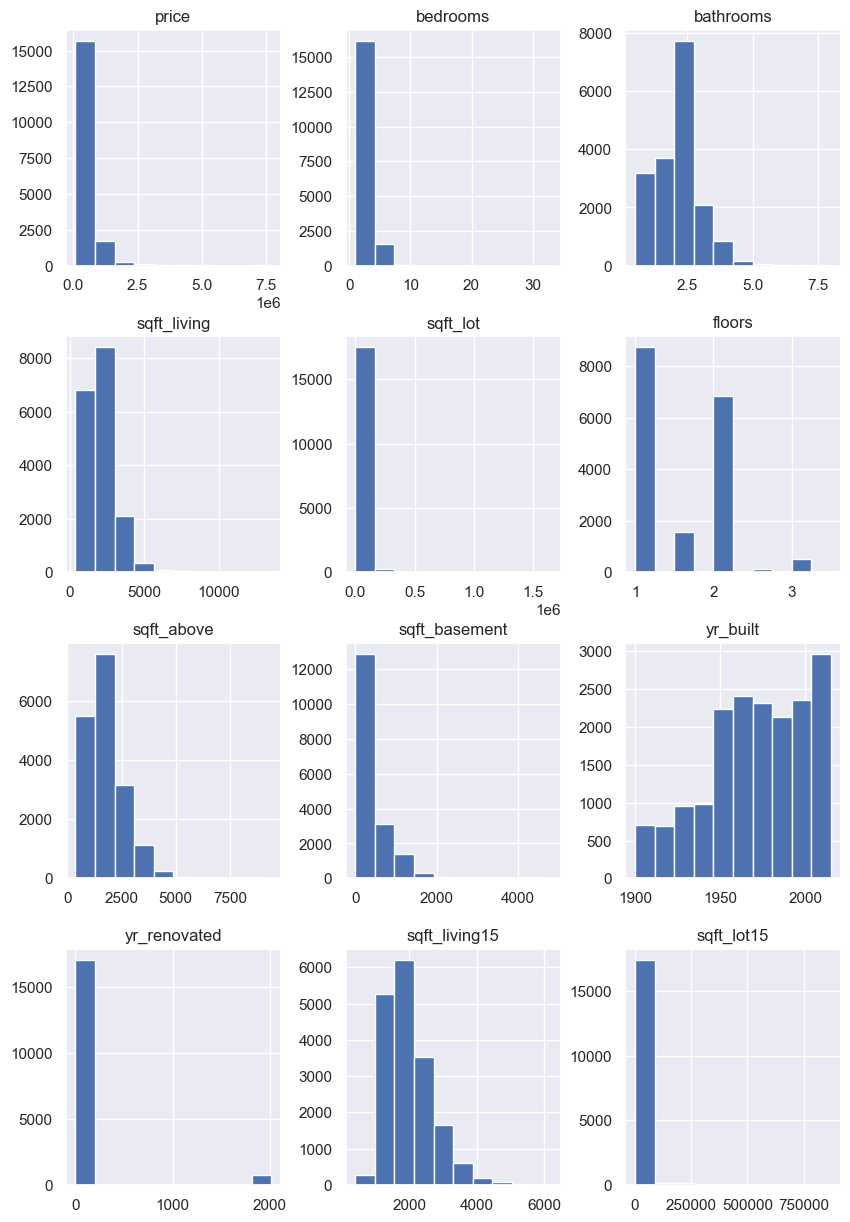

In [28]:
### creating histograms of the numerical columns
df_num = df_no_mv.select_dtypes('number')
df_num.hist(figsize = (10,15));

#### Dealing with the price column

In [29]:
## Exploring the descriptive statistics of price
df_no_mv['price'].describe()

count    1.775500e+04
mean     5.406600e+05
std      3.693006e+05
min      8.000000e+04
25%      3.217250e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Clearly the column has outliers.

In [30]:
## Removing the outliers in price
q1 = df_no_mv['price'].quantile(.25)
q3= df_no_mv['price'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['price'] <= out]
df_no_mv['price'].describe()

count    1.681200e+04
mean     4.772959e+05
std      2.079636e+05
min      8.000000e+04
25%      3.150000e+05
50%      4.379250e+05
75%      6.010000e+05
max      1.120000e+06
Name: price, dtype: float64

<Axes: >

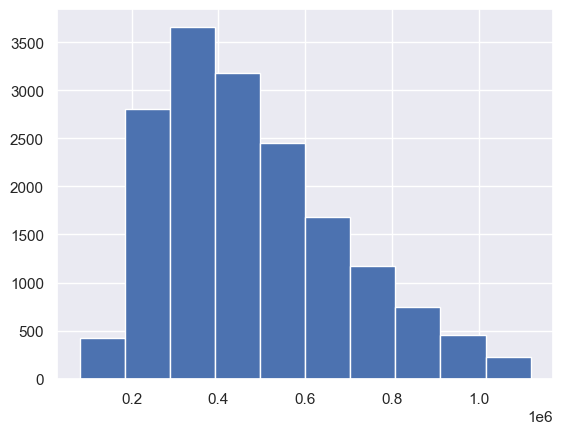

In [31]:
df_no_mv['price'].hist()

#### Dealing with the bedrooms,bathrooms and floors columns

We will consider these columns to be numerical. Having a high number of dummies makes it difficult to interpret the model. Also columns such as bedrooms can have varying values.

In [32]:
## Checking the bedrooms column
df_no_mv['bedrooms'].value_counts()

3     7859
4     5226
2     2233
5     1105
6      196
1      159
7       19
8        7
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [33]:
## Removing outliers in the bedrooms column
q1 = df_no_mv['bedrooms'].quantile(.25)
q3= df_no_mv['bedrooms'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['bedrooms']< out]
df_no_mv.bedrooms.describe()

count    16582.000000
mean         3.294597
std          0.817305
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64

In [34]:
# Having a  look at the floors column
df_no_mv['floors'].describe()

count    16582.00000
mean         1.47642
std          0.53550
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max          3.50000
Name: floors, dtype: float64

In [35]:
## Removing outliers in the floors column
q1 = df_no_mv['floors'].quantile(.25)
q3= df_no_mv['floors'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['floors']< out]
df_no_mv.floors.describe()

count    16577.000000
mean         1.475810
std          0.534427
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: floors, dtype: float64

In [36]:
## Checking the bathrooms column
df_no_mv['bathrooms'].describe()

count    16577.000000
mean         2.043841
std          0.695697
min          0.500000
25%          1.500000
50%          2.000000
75%          2.500000
max          6.000000
Name: bathrooms, dtype: float64

In [37]:
## Removing outliers in the bathrooms column
q1 = df_no_mv['bathrooms'].quantile(.25)
q3= df_no_mv['bathrooms'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['bathrooms']< out]
df_no_mv.bathrooms.describe()

count    16474.000000
mean         2.029971
std          0.674820
min          0.500000
25%          1.500000
50%          2.000000
75%          2.500000
max          3.750000
Name: bathrooms, dtype: float64

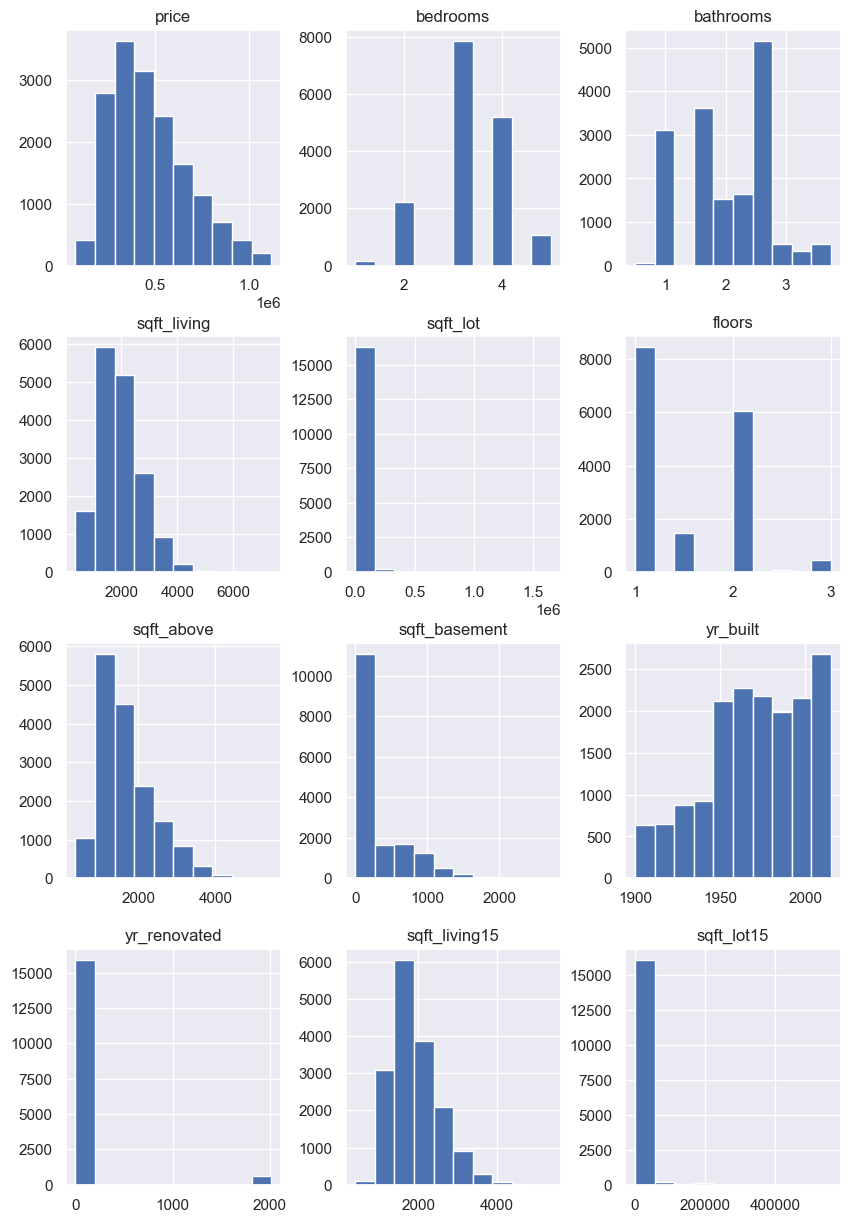

In [38]:
## Exploring the distributions of numerical columns in t df_no_mv
df_no_mv.select_dtypes('number').hist(figsize = (10,15));

In [39]:
## Taking a look at the descriptive statistics
df_no_mv.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.647400e+04,16474.000000,16474.000000,16474.000000,1.647400e+04,16474.000000,16474.000000,16474.000000,16474.000000,16474.000000,16474.000000,16474.000000
mean,4.734164e+05,3.288272,2.029971,1953.607139,1.462375e+04,1.473079,1693.518818,254.905609,1970.923577,72.312310,1916.988406,12408.171907
std,2.054793e+05,0.813965,0.674820,747.379447,4.026126e+04,0.534309,707.976393,398.546811,29.123265,372.938737,606.660158,25767.306735
min,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,659.000000
25%,3.145000e+05,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,1170.000000,0.000000,1952.000000,0.000000,1470.000000,5050.000000
50%,4.350000e+05,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,1510.000000,0.000000,1975.000000,0.000000,1800.000000,7528.000000
75%,5.989250e+05,4.000000,2.500000,2410.000000,1.026000e+04,2.000000,2080.000000,500.000000,1996.000000,0.000000,2280.000000,9867.500000
max,1.120000e+06,5.000000,3.750000,7350.000000,1.651359e+06,3.000000,5450.000000,2720.000000,2015.000000,2015.000000,5380.000000,560617.000000


In [40]:
## Removing the outliers in the sqft_living column
q1 = df_no_mv['sqft_living'].quantile(.25)
q3= df_no_mv['sqft_living'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_living']< out]
df_no_mv.sqft_living.describe()

count    16269.000000
mean      1923.574405
std        700.702045
min        370.000000
25%       1390.000000
50%       1830.000000
75%       2390.000000
max       3931.000000
Name: sqft_living, dtype: float64

<Axes: >

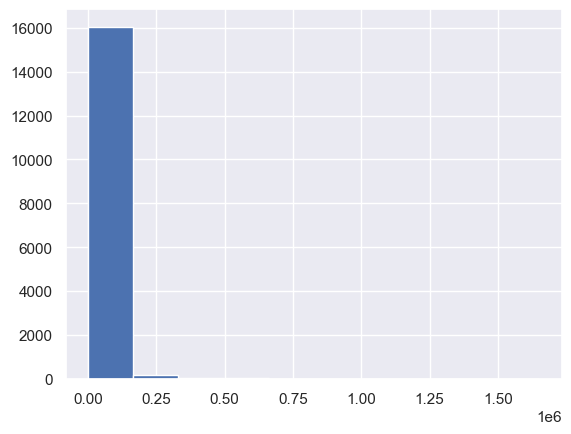

In [41]:
## Checking for outliers in the sqft_lot column
df_no_mv['sqft_lot'].hist()

In [42]:
## Removing the outliers in the sqft_lot column
q1 = df_no_mv['sqft_lot'].quantile(.25)
q3= df_no_mv['sqft_lot'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_lot']< out]
df_no_mv.sqft_lot.describe()

count    14547.000000
mean      7144.419193
std       3402.254776
min        520.000000
25%       4800.000000
50%       7131.000000
75%       9126.000000
max      17936.000000
Name: sqft_lot, dtype: float64

In [43]:
## Checking for outliers in the sqft_above column
df_no_mv['sqft_above'].describe()

count    14547.000000
mean      1621.441328
std        646.423119
min        370.000000
25%       1150.000000
50%       1460.000000
75%       1970.000000
max       3930.000000
Name: sqft_above, dtype: float64

In [44]:
## Removing outliers in the sqft_above column
q1 = df_no_mv['sqft_above'].quantile(.25)
q3= df_no_mv['sqft_above'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_above']< out]
df_no_mv.sqft_above.describe()

count    14157.000000
mean      1570.965247
std        577.290699
min        370.000000
25%       1140.000000
50%       1440.000000
75%       1910.000000
max       3192.000000
Name: sqft_above, dtype: float64

In [45]:
## Checking for outliers in the sqft_basement column
df_no_mv['sqft_basement'].describe()

count    14157.000000
mean       254.371689
std        383.884489
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1990.000000
Name: sqft_basement, dtype: float64

<Axes: >

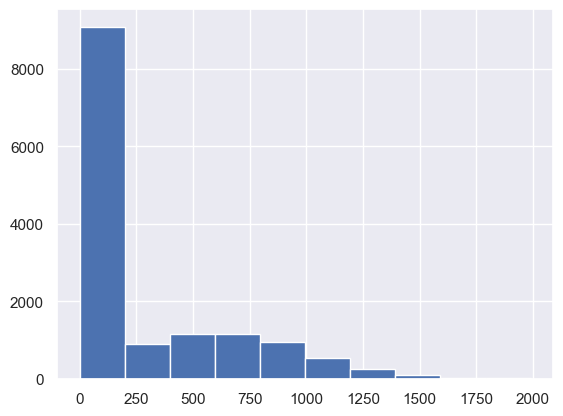

In [46]:
## Visualizing to see the outliers
df_no_mv['sqft_basement'].hist()

In [47]:
## Removing the outliers in the sqft_basement column
q1 = df_no_mv['sqft_basement'].quantile(.25)
q3= df_no_mv['sqft_basement'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_basement']< out]
df_no_mv.sqft_basement.describe()

count    13865.000000
mean       229.771655
std        347.274591
min          0.000000
25%          0.000000
50%          0.000000
75%        460.000000
max       1240.000000
Name: sqft_basement, dtype: float64

<Axes: >

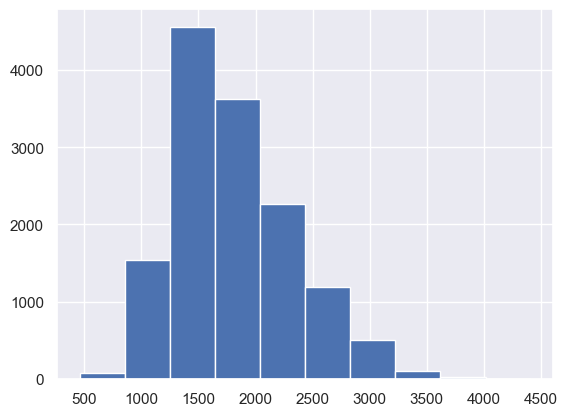

In [48]:
## Checking for outliers in the sqft_living15 column
df_no_mv['sqft_living15'].hist()

In [49]:
## Removing the outliers in the sqft_living15 column
q1 = df_no_mv['sqft_living15'].quantile(.25)
q3= df_no_mv['sqft_living15'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_living15']< out]
df_no_mv.sqft_living15.describe()

count    13701.000000
mean      1787.386760
std        489.996578
min        460.000000
25%       1420.000000
50%       1710.000000
75%       2100.000000
max       3150.000000
Name: sqft_living15, dtype: float64

<Axes: >

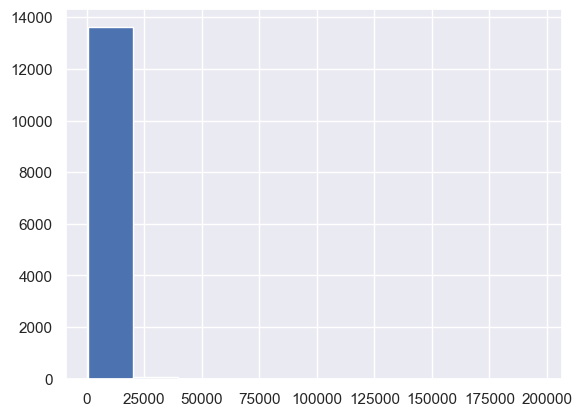

In [50]:
## Checking for outliers in the sqft_lot15 column
df_no_mv['sqft_lot15'].hist()

In [51]:
## Removing the outliers in the sqft_lot15 column
q1 = df_no_mv['sqft_lot15'].quantile(.25)
q3= df_no_mv['sqft_lot15'].quantile(.75)
r = 1.5*(q3- q1)
out = r+q3
df_no_mv = df_no_mv[df_no_mv['sqft_lot15']< out]
df_no_mv.sqft_lot15.describe()

count    13380.000000
mean      6756.977280
std       2823.035774
min        659.000000
25%       4794.750000
50%       7000.000000
75%       8591.250000
max      14700.000000
Name: sqft_lot15, dtype: float64

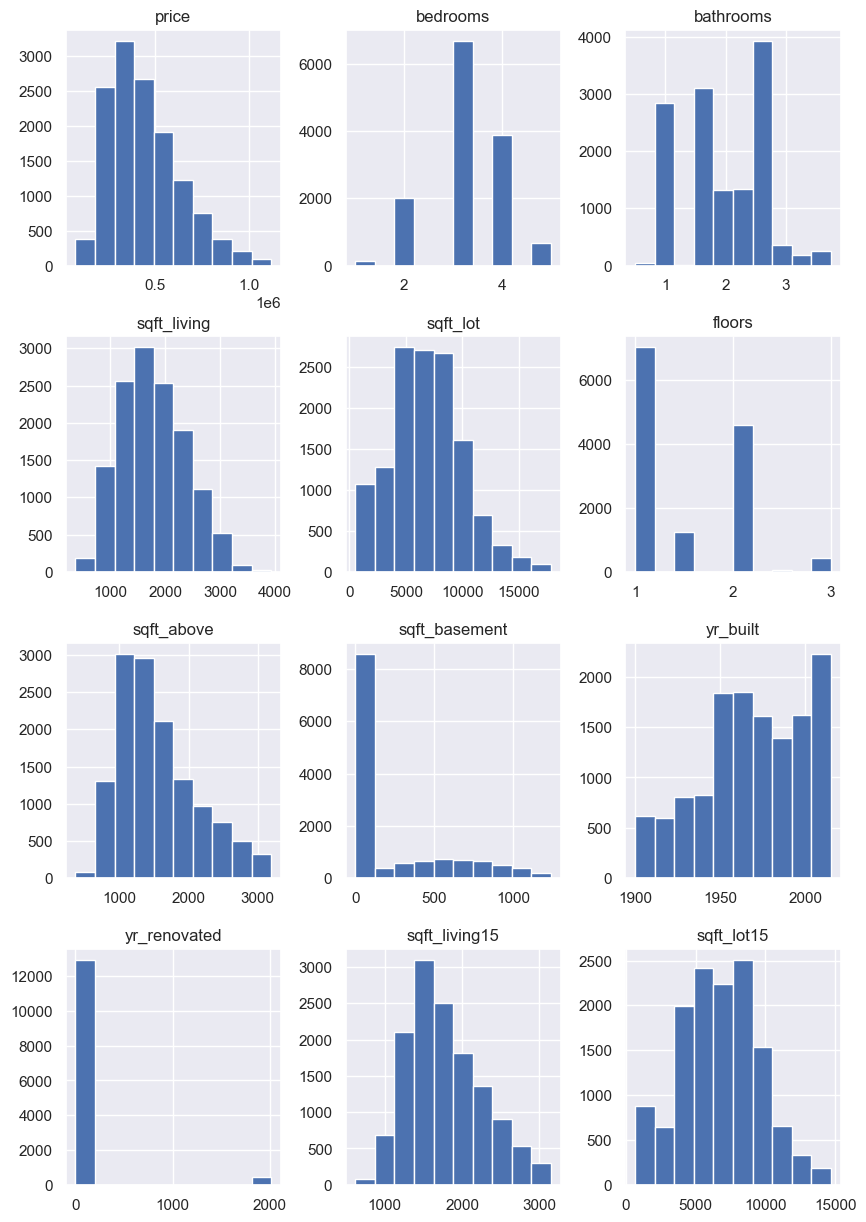

In [52]:
## Plotting the distributions of all the numerical columns in the df_no_mv dataframe
df_no_mv.select_dtypes('number').hist(figsize = (10,15));

There is an improvement from the previous distributions with the extreme outliers removed. Further modifications will be applied as the model is being improved.

### Feature engineering

* Some columns have outliers since most of the data points are zero.Feature engineering can be done to improve their meaning.For example the yr_renovated can be done to show whether the house was renovated or not.

In [53]:
## Taking a look at the dataframes info
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13380 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13380 non-null  datetime64[ns]
 1   price          13380 non-null  float64       
 2   bedrooms       13380 non-null  int64         
 3   bathrooms      13380 non-null  float64       
 4   sqft_living    13380 non-null  int64         
 5   sqft_lot       13380 non-null  int64         
 6   floors         13380 non-null  float64       
 7   waterfront     13380 non-null  object        
 8   view           13380 non-null  object        
 9   condition      13380 non-null  object        
 10  grade          13380 non-null  object        
 11  sqft_above     13380 non-null  int64         
 12  sqft_basement  13380 non-null  float64       
 13  yr_built       13380 non-null  int64         
 14  yr_renovated   13380 non-null  float64       
 15  sqft_living15  1338

Prices of houses may tend to change during different seasons.Converting the datetime column to a column containing the four seasons may help improve the model.

In [54]:
## Taking a look at the date column
df_no_mv['date'].head()

0   2014-10-13
1   2014-12-09
3   2014-12-09
4   2015-02-18
6   2014-06-27
Name: date, dtype: datetime64[ns]

In [55]:
## Creating a dictionary containing seasons
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}
## Adding a seasons column
df_no_mv['Seasons'] = df_no_mv['date'].dt.month.map(seasons)

In [56]:
## Dropping the date column
df_no_mv.drop('date',axis = 1,inplace = True)

In [57]:
## Creating a new column from the yr_renovated column
df_no_mv['Renovated'] = df_no_mv['yr_renovated'].map(lambda x: 'YES' if x==0 else 'NO' )

In [58]:
## Dropping the yr_renovated column
df_no_mv.drop('yr_renovated',axis = 1,inplace = True)
df_no_mv

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,Seasons,Renovated
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,Average,1180,0.0,1955,1340,5650,Autumn,YES
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,Average,2170,400.0,1951,1690,7639,Winter,NO
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,Average,1050,910.0,1965,1360,5000,Winter,YES
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,Good,1680,0.0,1987,1800,7503,Winter,YES
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,Average,1715,0.0,1995,2238,6819,Summer,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,Good,1530,0.0,2009,1530,1509,Spring,YES
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,Good,2310,0.0,2014,1830,7200,Winter,YES
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,Average,1020,0.0,2009,1020,2007,Summer,YES
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,Good,1600,0.0,2004,1410,1287,Winter,YES


In [59]:
## Creating a new column showing whether a house has a basement or not
df_no_mv['Has basement'] = df_no_mv['sqft_basement'].map(lambda x: 'YES' if x==0 else 'NO' )
df_no_mv

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,Seasons,Renovated,Has basement
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,Average,1180,0.0,1955,1340,5650,Autumn,YES,YES
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,Average,2170,400.0,1951,1690,7639,Winter,NO,NO
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,Average,1050,910.0,1965,1360,5000,Winter,YES,NO
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,Good,1680,0.0,1987,1800,7503,Winter,YES,YES
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,Average,1715,0.0,1995,2238,6819,Summer,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,Good,1530,0.0,2009,1530,1509,Spring,YES,YES
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,Good,2310,0.0,2014,1830,7200,Winter,YES,YES
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,Average,1020,0.0,2009,1020,2007,Summer,YES,YES
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,Good,1600,0.0,2004,1410,1287,Winter,YES,YES


In [60]:
## Creating a new dataframe without the sqft_basement column
df_cleaned = df_no_mv.drop(['sqft_basement'],axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13380 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          13380 non-null  float64
 1   bedrooms       13380 non-null  int64  
 2   bathrooms      13380 non-null  float64
 3   sqft_living    13380 non-null  int64  
 4   sqft_lot       13380 non-null  int64  
 5   floors         13380 non-null  float64
 6   waterfront     13380 non-null  object 
 7   view           13380 non-null  object 
 8   condition      13380 non-null  object 
 9   grade          13380 non-null  object 
 10  sqft_above     13380 non-null  int64  
 11  yr_built       13380 non-null  int64  
 12  sqft_living15  13380 non-null  int64  
 13  sqft_lot15     13380 non-null  int64  
 14  Seasons        13380 non-null  object 
 15  Renovated      13380 non-null  object 
 16  Has basement   13380 non-null  object 
dtypes: float64(3), int64(7), object(7)
memory usage: 1

### Creating Dummy variables

In [61]:
## Checking the names of categorical columns
cat = list(df_cleaned.select_dtypes('object').columns.values)
cat

['waterfront',
 'view',
 'condition',
 'grade',
 'Seasons',
 'Renovated',
 'Has basement']

In [62]:
## Creating dummies
df_dum = pd.get_dummies(df_cleaned,columns = cat,drop_first = True)
df_dum

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,...,grade_ Low,grade_ Low Average,grade_ Poor,grade_0 Very Good,grade_1 Excellent,Seasons_Spring,Seasons_Summer,Seasons_Winter,Renovated_YES,Has basement_YES
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,...,0,0,0,0,0,0,0,0,1,1
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1690,7639,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,1360,5000,...,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,1800,7503,...,0,0,0,0,0,0,0,1,1,1
6,257500.0,3,2.25,1715,6819,2.0,1715,1995,2238,6819,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,2009,1530,1509,...,0,0,0,0,0,1,0,0,1,1
21593,400000.0,4,2.50,2310,5813,2.0,2310,2014,1830,7200,...,0,0,0,0,0,0,0,1,1,1
21594,402101.0,2,0.75,1020,1350,2.0,1020,2009,1020,2007,...,0,0,0,0,0,0,1,0,1,1
21595,400000.0,3,2.50,1600,2388,2.0,1600,2004,1410,1287,...,0,0,0,0,0,0,0,1,1,1


In [63]:
df_dum.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_ Better', 'grade_ Fair',
       'grade_ Good', 'grade_ Low', 'grade_ Low Average', 'grade_ Poor',
       'grade_0 Very Good', 'grade_1 Excellent', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Renovated_YES',
       'Has basement_YES'], dtype=object)

## Checking the dataset for multicollinearity

Before creating the model it is a good idea to remove features with a high correlation in order to avoid multicollinearity and improve the model

In [64]:
## Creating a crosstab with only the numerical features/inputs (no dummy variables)
dfx = df_cleaned.drop('price',axis = 1)
cross_tab = dfx.select_dtypes('number').corr().abs() > 0.7

In [65]:
## Creating a heat
cross_tab

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,True,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,True
floors,False,False,False,False,True,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,True,False
sqft_lot15,False,False,False,True,False,False,False,False,True


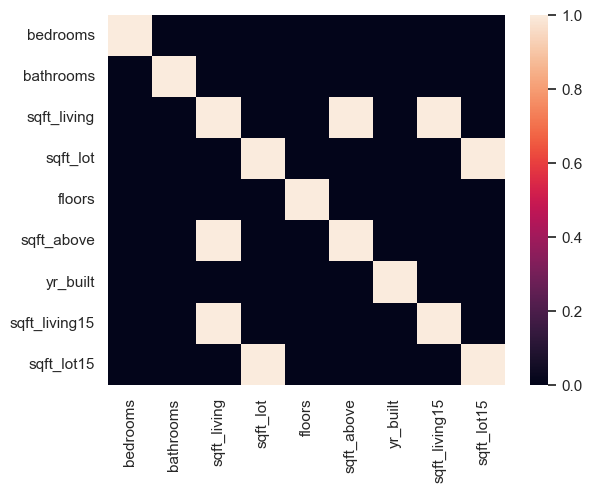

In [66]:
## Creating a heatmap from the crosstab
sns.heatmap(cross_tab);

The squares in white showcase correlations of above 0.7 which is a moderate to strong correlation.
The following columns will be dropped to avoid multicollinearity
`['sqft_lot15','sqft_above','sqft_living15']`

In [67]:
## dropping the listed columns to be used by the model
df_mod = df_dum.drop(['sqft_lot15','sqft_living15','sqft_above'],axis = 1)
df_mod.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'yr_built', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_ Better', 'grade_ Fair',
       'grade_ Good', 'grade_ Low', 'grade_ Low Average', 'grade_ Poor',
       'grade_0 Very Good', 'grade_1 Excellent', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Renovated_YES',
       'Has basement_YES'],
      dtype='object')

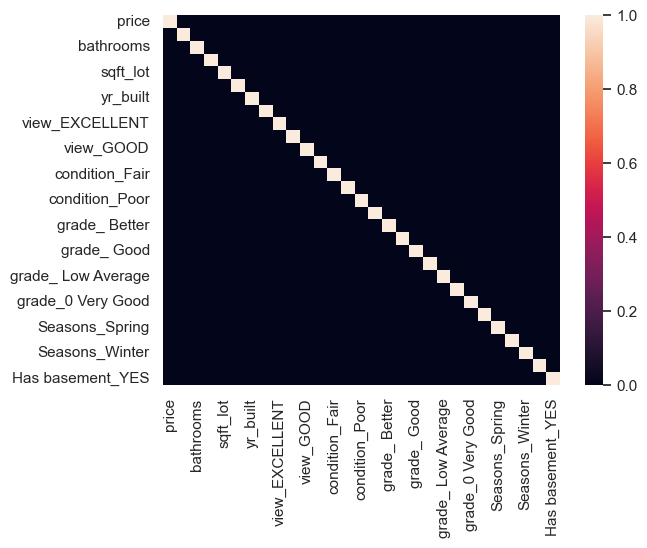

In [68]:
## Confirming for any multicollinearity in the entire dataset
cross_tab2 = df_mod.select_dtypes('number').corr().abs() > 0.7
sns.heatmap(cross_tab2);

### Creating a baseline model

In order to create a baseline model we will use the feature with the highest correlation as the independent variable. The r_squared of this model will be compared to note any improvement.

In [69]:
## Checking the correlation with price
df_mod.select_dtypes('number').corr().abs()['price'].sort_values(ascending = False)

price                  1.000000
sqft_living            0.526742
bathrooms              0.359530
grade_ Better          0.348510
grade_ Low Average     0.274013
floors                 0.238271
bedrooms               0.234744
grade_ Good            0.231691
view_NONE              0.219349
grade_0 Very Good      0.201648
Has basement_YES       0.200273
grade_ Fair            0.114561
Renovated_YES          0.112303
view_EXCELLENT         0.104929
view_GOOD              0.094719
view_FAIR              0.086748
sqft_lot               0.086575
condition_Very Good    0.083349
condition_Fair         0.063501
yr_built               0.048375
waterfront_YES         0.048123
Seasons_Winter         0.047643
grade_1 Excellent      0.046229
Seasons_Spring         0.045858
grade_ Low             0.040532
condition_Poor         0.027054
Seasons_Summer         0.011224
grade_ Poor            0.008413
condition_Good         0.008368
Name: price, dtype: float64

In [70]:
## Defining the input and target
X_base = df_mod[['sqft_living']]
y = df_mod['price']
## Creating the baseline model
model_base = sm.OLS(endog = y,exog = sm.add_constant(X_base)).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     5137.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:28:13   Log-Likelihood:            -1.7935e+05
No. Observations:               13380   AIC:                         3.587e+05
Df Residuals:                   13378   BIC:                         3.587e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.478e+05   4380.166     33.746      0.000    1.39e+05    1.56e+05
sqft_living   166.5640      2.324     71.674      0.000     162.009     171.119
==============================================================================
Omnibus:                      753.416   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              884.741
Skew:                           0.621   Prob(JB):                    7.60e-193
Kurtosis:                       3.215   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The baseline model explains about 28% of the variance in price
* An increase in the living space by one square foot results in an increase in price by about $165 

### Creating a multiple linear regression model

#### Model_1

In [71]:
## Defining the input and targets
X = df_mod.drop('price',axis = 1)
y = df_mod['price']
## Creating the model
model_1 = sm.OLS(endog = y,exog = sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     552.3
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:28:14   Log-Likelihood:            -1.7638e+05
No. Observations:               13380   AIC:                         3.528e+05
Df Residuals:                   13351   BIC:                         3.530e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.383e+06   1.05e+05     51.384      0.000    5.18e+06    5.59e+06
bedrooms            -1.534e+04   1850.443     -8.291      0.000    -1.9e+04   -1.17e+04
bathrooms            2.073e+04   2951.805      7.022      0.000    1.49e+04    2.65e+04
sqft_living           102.2967      3.446     29.690      0.000      95.543     109.050
sqft_lot               -7.5987      0.435    -17.483      0.000      -8.451      -6.747
floors               2.245e+04   3190.085      7.038      0.000    1.62e+04    2.87e+04
yr_built            -2580.4704     55.455    -46.532      0.000   -2689.171   -2471.770
waterfront_YES       1.279e+05   4.08e+04      3.137      0.002     4.8e+04    2.08e+05
view_EXCELLENT       1.042e+05   2.06e+04      5.058      0.000    6.38e+04    1.45e+05
view_FAIR              1.1e+04   1.18e+04      0.930      0.352   -1.22e+04    3.42e+04
view_GOOD            4606.0329   1.27e+04      0.362      0.718   -2.04e+04    2.96e+04
view_NONE           -5.283e+04   6390.764     -8.267      0.000   -6.54e+04   -4.03e+04
condition_Fair      -3.342e+04   1.29e+04     -2.585      0.010   -5.88e+04   -8074.516
condition_Good       1.721e+04   2813.390      6.119      0.000    1.17e+04    2.27e+04
condition_Poor      -5.805e+04   3.46e+04     -1.679      0.093   -1.26e+05    9735.988
condition_Very Good  4.211e+04   4427.152      9.511      0.000    3.34e+04    5.08e+04
grade_ Better        2.262e+05   5006.005     45.189      0.000    2.16e+05    2.36e+05
grade_ Fair         -1.567e+05   1.12e+04    -13.978      0.000   -1.79e+05   -1.35e+05
grade_ Good          1.031e+05   3028.881     34.048      0.000    9.72e+04    1.09e+05
grade_ Low          -1.668e+05   3.91e+04     -4.266      0.000   -2.43e+05   -9.02e+04
grade_ Low Average  -9.233e+04   3992.628    -23.126      0.000      -1e+05   -8.45e+04
grade_ Poor         -1.044e+05   1.29e+05     -0.811      0.417   -3.57e+05    1.48e+05
grade_0 Very Good    3.259e+05   1.05e+04     30.994      0.000    3.05e+05    3.46e+05
grade_1 Excellent    4.583e+05   6.45e+04      7.104      0.000    3.32e+05    5.85e+05
Seasons_Spring       2.518e+04   3057.324      8.235      0.000    1.92e+04    3.12e+04
Seasons_Summer       7803.8994   3092.077      2.524      0.012    1742.989    1.39e+04
Seasons_Winter        634.9053   3527.766      0.180      0.857   -6280.016    7549.826
Renovated_YES       -9668.9250   6434.983     -1.503      0.133   -2.23e+04    2944.554
Has basement_YES    -1.969e+04   2745.138     -7.174      0.000   -2.51e+04   -1.43e+04
==============================================================================
Omnibus:                      709.302   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.103
Skew:                         

* The model explains about 54% of the variance in price. This is a great improvement from the baseline model.
* The inputs will be standardized in order to determine the weights and hence tell the magnitude of their impact.

### Standardizing the inputs

In [72]:
## Importing the relevant packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [73]:
### standardizing the inputs
std_scl = StandardScaler()
lr = LinearRegression()
x_scaled = std_scl.fit_transform(X)
model_2 = lr.fit(x_scaled,y)
weights = pd.DataFrame()
weights['inputs'] = X.columns
weights['weight'] = model_2.coef_
weights.sort_values(by = 'weight',ascending = True)

,inputs,weight
5,yr_built,-77775.545199
19,grade_ Low Average,-29198.236977
3,sqft_lot,-24333.575308
16,grade_ Fair,-15999.270058
10,view_NONE,-12415.572014
0,bedrooms,-12187.936959
27,Has basement_YES,-9506.509755
18,grade_ Low,-4780.366932
11,condition_Fair,-2921.220811
13,condition_Poor,-1876.840608


The same features with that were not statistically signifant in our model have the lowest weight(considering the absolute values). We will drop  them and see the performance of the new model.

### Model_2

In [74]:
## Defining the new input
X_2 = df_mod.drop(['price','condition_Poor','view_GOOD','Seasons_Winter','grade_ Poor','view_FAIR' \
                  ,'Renovated_YES'],axis = 1)
## Creating the second model
model_2 = sm.OLS(endog = y,exog = sm.add_constant(X_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     702.6
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:28:17   Log-Likelihood:            -1.7638e+05
No. Observations:               13380   AIC:                         3.528e+05
Df Residuals:                   13357   BIC:                         3.530e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.42e+06   1.01e+05     53.784      0.000    5.22e+06    5.62e+06
bedrooms            -1.539e+04   1848.209     -8.330      0.000    -1.9e+04   -1.18e+04
bathrooms            2.125e+04   2922.433      7.271      0.000    1.55e+04     2.7e+04
sqft_living           102.3716      3.445     29.718      0.000      95.619     109.124
sqft_lot               -7.6010      0.434    -17.502      0.000      -8.452      -6.750
floors               2.253e+04   3188.677      7.065      0.000    1.63e+04    2.88e+04
yr_built            -2602.8208     52.466    -49.609      0.000   -2705.662   -2499.979
waterfront_YES       1.314e+05   4.07e+04      3.225      0.001    5.15e+04    2.11e+05
view_EXCELLENT           1e+05   2.02e+04      4.952      0.000    6.04e+04     1.4e+05
view_NONE           -5.608e+04   5033.335    -11.142      0.000   -6.59e+04   -4.62e+04
condition_Fair      -3.374e+04   1.29e+04     -2.612      0.009   -5.91e+04   -8422.553
condition_Good       1.683e+04   2783.218      6.049      0.000    1.14e+04    2.23e+04
condition_Very Good  4.127e+04   4378.185      9.427      0.000    3.27e+04    4.99e+04
grade_ Better        2.263e+05   5005.506     45.210      0.000    2.16e+05    2.36e+05
grade_ Fair         -1.582e+05   1.12e+04    -14.147      0.000    -1.8e+05   -1.36e+05
grade_ Good          1.032e+05   3028.303     34.074      0.000    9.72e+04    1.09e+05
grade_ Low          -1.664e+05   3.91e+04     -4.257      0.000   -2.43e+05   -8.98e+04
grade_ Low Average  -9.266e+04   3988.289    -23.234      0.000      -1e+05   -8.48e+04
grade_0 Very Good    3.256e+05   1.05e+04     30.985      0.000    3.05e+05    3.46e+05
grade_1 Excellent    4.583e+05   6.45e+04      7.110      0.000    3.32e+05    5.85e+05
Seasons_Spring       2.496e+04   2668.569      9.352      0.000    1.97e+04    3.02e+04
Seasons_Summer       7641.3745   2709.067      2.821      0.005    2331.219     1.3e+04
Has basement_YES    -1.962e+04   2742.258     -7.155      0.000    -2.5e+04   -1.42e+04
==============================================================================
Omnibus:                      712.906   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1097.217
Skew:                           0.462   Prob(JB):                    5.53e-239
Kurtosis:                       4.056   Cond. No.                     7.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Removing the statistically insignificant features did not improve the model by any means. The R_squared dropped by 0.001. We will continue with the previous model

### Calculating the VIFs

In [75]:
## Importing the relevant packages
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIFs for each predictor variable
vif = pd.DataFrame()
X_with_constant = sm.add_constant(X)

vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in\
              range(1, X_with_constant.shape[1])]


In [76]:
vif

,Variable,VIF
0,bedrooms,1.749055
1,bathrooms,3.038205
2,sqft_living,3.421186
3,sqft_lot,1.568171
4,floors,2.428334
5,yr_built,2.261340
6,waterfront_YES,1.306646
7,view_EXCELLENT,1.431688
8,view_FAIR,1.362791
9,view_GOOD,1.301317


The VIFs are low. We can conclude that the dataset has no multicollinearity

### Exploring the distribution of residuals

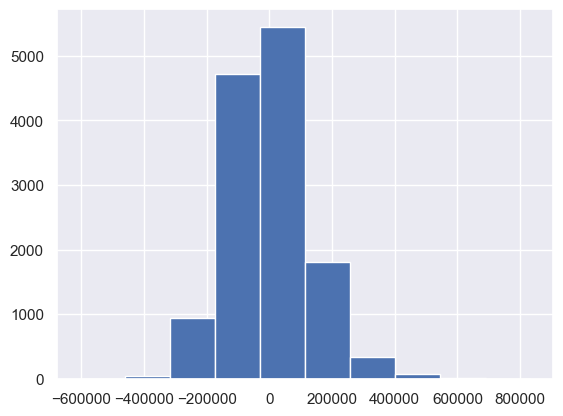

In [77]:
model_1.resid.hist();

The residuals are not normally distributed with longer tails showing high cases of over and under estimates of the target

### Building a model with log_price as the target

### Model_3

In [78]:
df_mod['log_price'] = np.log(df_mod['price'])

In [79]:
## Defining the input and targets
X_3 = df_mod.drop(['price','log_price'],axis = 1)
y = df_mod['price']
## Creating the model
model_3 = sm.OLS(endog = y,exog = sm.add_constant(X_3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     552.3
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:28:23   Log-Likelihood:            -1.7638e+05
No. Observations:               13380   AIC:                         3.528e+05
Df Residuals:                   13351   BIC:                         3.530e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.383e+06   1.05e+05     51.384      0.000    5.18e+06    5.59e+06
bedrooms            -1.534e+04   1850.443     -8.291      0.000    -1.9e+04   -1.17e+04
bathrooms            2.073e+04   2951.805      7.022      0.000    1.49e+04    2.65e+04
sqft_living           102.2967      3.446     29.690      0.000      95.543     109.050
sqft_lot               -7.5987      0.435    -17.483      0.000      -8.451      -6.747
floors               2.245e+04   3190.085      7.038      0.000    1.62e+04    2.87e+04
yr_built            -2580.4704     55.455    -46.532      0.000   -2689.171   -2471.770
waterfront_YES       1.279e+05   4.08e+04      3.137      0.002     4.8e+04    2.08e+05
view_EXCELLENT       1.042e+05   2.06e+04      5.058      0.000    6.38e+04    1.45e+05
view_FAIR              1.1e+04   1.18e+04      0.930      0.352   -1.22e+04    3.42e+04
view_GOOD            4606.0329   1.27e+04      0.362      0.718   -2.04e+04    2.96e+04
view_NONE           -5.283e+04   6390.764     -8.267      0.000   -6.54e+04   -4.03e+04
condition_Fair      -3.342e+04   1.29e+04     -2.585      0.010   -5.88e+04   -8074.516
condition_Good       1.721e+04   2813.390      6.119      0.000    1.17e+04    2.27e+04
condition_Poor      -5.805e+04   3.46e+04     -1.679      0.093   -1.26e+05    9735.988
condition_Very Good  4.211e+04   4427.152      9.511      0.000    3.34e+04    5.08e+04
grade_ Better        2.262e+05   5006.005     45.189      0.000    2.16e+05    2.36e+05
grade_ Fair         -1.567e+05   1.12e+04    -13.978      0.000   -1.79e+05   -1.35e+05
grade_ Good          1.031e+05   3028.881     34.048      0.000    9.72e+04    1.09e+05
grade_ Low          -1.668e+05   3.91e+04     -4.266      0.000   -2.43e+05   -9.02e+04
grade_ Low Average  -9.233e+04   3992.628    -23.126      0.000      -1e+05   -8.45e+04
grade_ Poor         -1.044e+05   1.29e+05     -0.811      0.417   -3.57e+05    1.48e+05
grade_0 Very Good    3.259e+05   1.05e+04     30.994      0.000    3.05e+05    3.46e+05
grade_1 Excellent    4.583e+05   6.45e+04      7.104      0.000    3.32e+05    5.85e+05
Seasons_Spring       2.518e+04   3057.324      8.235      0.000    1.92e+04    3.12e+04
Seasons_Summer       7803.8994   3092.077      2.524      0.012    1742.989    1.39e+04
Seasons_Winter        634.9053   3527.766      0.180      0.857   -6280.016    7549.826
Renovated_YES       -9668.9250   6434.983     -1.503      0.133   -2.23e+04    2944.554
Has basement_YES    -1.969e+04   2745.138     -7.174      0.000   -2.51e+04   -1.43e+04
==============================================================================
Omnibus:                      709.302   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.103
Skew:                         

Using a log transformed column did not improve the model.

* Reducing the number of dummies in a column might help increase the R_squares by increasing the simplicity of the dataset

In [80]:
## Taking a look at the df_no_mv dataframe
df_no_mv

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,Seasons,Renovated,Has basement
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,Average,1180,0.0,1955,1340,5650,Autumn,YES,YES
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,Average,2170,400.0,1951,1690,7639,Winter,NO,NO
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,Average,1050,910.0,1965,1360,5000,Winter,YES,NO
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,Good,1680,0.0,1987,1800,7503,Winter,YES,YES
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,Average,1715,0.0,1995,2238,6819,Summer,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,Good,1530,0.0,2009,1530,1509,Spring,YES,YES
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,Good,2310,0.0,2014,1830,7200,Winter,YES,YES
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,Average,1020,0.0,2009,1020,2007,Summer,YES,YES
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,Good,1600,0.0,2004,1410,1287,Winter,YES,YES


### Further feature engineering

In [81]:
## Looking at the categories in the grade column
df_no_mv['grade'].value_counts()

 Average        6477
 Good           3922
 Low Average    1508
 Better         1143
0 Very Good      173
 Fair            141
 Low              11
1 Excellent        4
 Poor              1
Name: grade, dtype: int64

In [82]:
## Creating a function that will group the categories in grade column
## It will group into above average,average or below average
def group_cat (description):
    if (description =='Good' or description == '0 Very Good' or description=='Better' or\
       description == '1 Excellent'):
        return 'ABOVE AVERAGE'
    elif (description == 'Poor' or description == 'Low' or description == 'Fair' or \
         description == 'Low Average'):
        return 'BELOW AVERAGE'
    else :
        return 'AVERAGE'
        
        

In [83]:
## Changing the categories using the function
df_no_mv['grade'] = df_no_mv['grade'].map(group_cat)

In [86]:
df_no_mv

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,Seasons,Renovated,Has basement
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,AVERAGE,1180,0.0,1955,1340,5650,Autumn,YES,YES
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,AVERAGE,2170,400.0,1951,1690,7639,Winter,NO,NO
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,AVERAGE,1050,910.0,1965,1360,5000,Winter,YES,NO
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,AVERAGE,1680,0.0,1987,1800,7503,Winter,YES,YES
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,AVERAGE,1715,0.0,1995,2238,6819,Summer,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,AVERAGE,1530,0.0,2009,1530,1509,Spring,YES,YES
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,AVERAGE,2310,0.0,2014,1830,7200,Winter,YES,YES
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,AVERAGE,1020,0.0,2009,1020,2007,Summer,YES,YES
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,AVERAGE,1600,0.0,2004,1410,1287,Winter,YES,YES


In [86]:
## Creating dummy variables
cat2 = df_no_mv.select_dtypes('object').columns.values
df_dum2 = pd.get_dummies(df_no_mv,columns = cat2,drop_first = True).drop('sqft_basement',axis = 1)
df_dum2.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_AVERAGE', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Renovated_YES',
       'Has basement_YES'], dtype=object)

In [88]:
## Creating a model from the  dataset
X_4 = df_dum2.drop(['price','sqft_above','sqft_lot15','sqft_living15'],axis = 1)
y = df_dum2['price']
model_4 = sm.OLS(y,sm.add_constant(X_4)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     491.9
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:39:18   Log-Likelihood:            -1.7769e+05
No. Observations:               13380   AIC:                         3.554e+05
Df Residuals:                   13358   BIC:                         3.556e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.346e+06   1.13e+05     38.593      0.000    4.13e+06    4.57e+06
bedrooms            -2.668e+04   2008.818    -13.284      0.000   -3.06e+04   -2.27e+04
bathrooms            2.988e+04   3234.074      9.238      0.000    2.35e+04    3.62e+04
sqft_living           178.1953      3.454     51.592      0.000     171.425     184.966
sqft_lot               -8.0627      0.479    -16.833      0.000      -9.002      -7.124
floors               4.707e+04   3471.690     13.559      0.000    4.03e+04    5.39e+04
yr_built            -2001.6919     59.687    -33.537      0.000   -2118.686   -1884.697
waterfront_YES       8.593e+04    4.5e+04      1.911      0.056   -2214.041    1.74e+05
view_EXCELLENT       1.134e+05   2.27e+04      4.993      0.000    6.89e+04    1.58e+05
view_FAIR            8236.2709    1.3e+04      0.631      0.528   -1.73e+04    3.38e+04
view_GOOD            5366.5051    1.4e+04      0.382      0.702   -2.21e+04    3.29e+04
view_NONE           -7.675e+04   7028.669    -10.919      0.000   -9.05e+04    -6.3e+04
condition_Fair      -5.794e+04   1.42e+04     -4.084      0.000   -8.58e+04   -3.01e+04
condition_Good       1.687e+04   3100.638      5.441      0.000    1.08e+04    2.29e+04
condition_Poor      -1.114e+05   3.81e+04     -2.927      0.003   -1.86e+05   -3.68e+04
condition_Very Good  3.512e+04   4878.864      7.199      0.000    2.56e+04    4.47e+04
grade_AVERAGE       -1.836e+05    1.1e+04    -16.667      0.000   -2.05e+05   -1.62e+05
Seasons_Spring       2.531e+04   3371.833      7.507      0.000    1.87e+04    3.19e+04
Seasons_Summer       8905.2843   3409.810      2.612      0.009    2221.575    1.56e+04
Seasons_Winter       -551.3630   3889.846     -0.142      0.887   -8176.013    7073.287
Renovated_YES       -1.938e+04   7091.681     -2.733      0.006   -3.33e+04   -5483.447
Has basement_YES    -1.545e+04   3000.574     -5.147      0.000   -2.13e+04   -9563.741
==============================================================================
Omnibus:                      703.587   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.406
Skew:                           0.530   Prob(JB):                    5.45e-193
Kurtosis:                       3.681   Cond. No.                     7.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Compared to model_1 this model has a lower R_squared of about 44%. This is a decrease in the performance of the model

### Calculating the MSE of the model